<a href="https://colab.research.google.com/github/taengbae/DNA/blob/main/%EC%98%A4%EC%82%B0%EC%8B%9C%EA%B3%B5%EB%AA%A8%EC%A0%84_%EC%96%B4%EB%A6%B0%EC%9D%B4%EC%A7%91%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

In [ ]:
어린이집현황 = '/content/drive/MyDrive/Colab Notebooks/data/어린이집현황(개방표준).csv'
data = pd.read_csv(어린이집현황, encoding='cp949') #숫자변환 x
data_k = pd.read_csv(어린이집현황, encoding='cp949') #숫자변환 o

In [ ]:
#날짜 변경
data['데이터기준일자'] = pd.to_datetime(data['데이터기준일자'])

In [ ]:
data_k['어린이집유형구분'] = data_k['어린이집유형구분'].map({'민간':0, '가정':1, '직장':2, '법인·단체':3, '국공립':4, '사회복지법인':5})
data_k['통학차량운영여부'] = data_k['통학차량운영여부'].map({'Y':0, 'N':1})

In [ ]:
data.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자
0,홍익어린이집,경기도,가평군,민간,98,17.0,경기도 가평군 가평읍 석봉로153번길 16,031-581-2662,031-581-2662,98.0,17.0,13.0,Y,http://www.childcare.go.kr/,2021-06-28
1,에코비어린이집,경기도,가평군,민간,34,7.0,경기도 가평군 조종면 청군로 1300 에코비어린이집,031-585-4834,031-585-4834,34.0,7.0,5.0,Y,http://www.childcare.go.kr/,2021-06-28
2,꿈에그린어린이집,경기도,가평군,직장,30,7.0,경기도 가평군 조종면 청군로 1149 꿈에그린어린이집,031-585-1002,031-585-1002,30.0,7.0,10.0,N,http://www.childcare.go.kr/,2021-06-28
3,맹호어린이집,경기도,가평군,직장,73,10.0,경기도 가평군 조종면 청군로 1208 맹호어린이집,031-585-1133,031-585-1133,73.0,10.0,8.0,N,http://www.childcare.go.kr/,2021-06-28
4,에코비해솔어린이집,경기도,가평군,가정,20,6.0,경기도 가평군 가화로 223 파란채아파트 103-105,031-581-1137,031-581-1137,20.0,6.0,4.0,Y,http://www.childcare.go.kr/,2021-06-28


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11551 entries, 0 to 11550
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   어린이집명     11551 non-null  object        
 1   시도명       11551 non-null  object        
 2   시군구명      11551 non-null  object        
 3   어린이집유형구분  11551 non-null  object        
 4   정원수       11551 non-null  int64         
 5   보육교직원수    10813 non-null  float64       
 6   소재지도로명주소  11551 non-null  object        
 7   어린이집전화번호  11551 non-null  object        
 8   어린이집팩스번호  5974 non-null   object        
 9   보육실수      6874 non-null   float64       
 10  놀이터수      5543 non-null   float64       
 11  CCTV설치수   7202 non-null   float64       
 12  통학차량운영여부  8941 non-null   object        
 13  홈페이지주소    2019 non-null   object        
 14  데이터기준일자   11551 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
#결측치 확인
data.isnull().sum()

어린이집명          0
시도명            0
시군구명           0
어린이집유형구분       0
정원수            0
보육교직원수       738
소재지도로명주소       0
어린이집전화번호       0
어린이집팩스번호    5577
보육실수        4677
놀이터수        6008
CCTV설치수     4349
통학차량운영여부    2610
홈페이지주소      9532
데이터기준일자        0
dtype: int64

In [ ]:
#오산시 어린이집 수 추이
osan = data[data['시군구명'] == '오산시']
osan.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자
7754,휴튼사과나무어린이집,경기도,오산시,가정,20,5.0,"경기도 오산시 수청로 165 905동 104호(금암동,죽미마을휴먼시아휴튼아파트)",031-376-6203,031-376-6203,3.0,0.0,4.0,N,NaN,2020-05-01
7755,코코가베어린이집,경기도,오산시,가정,20,6.0,"경기도 오산시 운암로 63 104동 102호(오산동, 현대아파트)",031-373-5928,031-373-5928,3.0,0.0,4.0,N,NaN,2020-05-01
7756,큰사랑어린이집,경기도,오산시,가정,20,6.0,"경기도 오산시 운암로 89 204동 101호(오산동, 운암주공2단지아파트)",031-375-1423,031-375-1423,4.0,0.0,4.0,N,NaN,2020-05-01
7757,키즈맘어린이집,경기도,오산시,가정,20,6.0,경기도 오산시 누읍로46번길 25 (누읍동),031-372-2050,NaN,3.0,0.0,4.0,N,NaN,2020-05-01
7758,키즈청호어린이집,경기도,오산시,민간,138,18.0,경기도 오산시 남부대로441번길 17-1,031-668-5557,031-611-3558,10.0,2.0,16.0,Y,NaN,2020-05-01


In [ ]:
osan

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자
7754,휴튼사과나무어린이집,경기도,오산시,가정,20,5.0,"경기도 오산시 수청로 165 905동 104호(금암동,죽미마을휴먼시아휴튼아파트)",031-376-6203,031-376-6203,3.0,0.0,4.0,N,NaN,2020-05-01
7755,코코가베어린이집,경기도,오산시,가정,20,6.0,"경기도 오산시 운암로 63 104동 102호(오산동, 현대아파트)",031-373-5928,031-373-5928,3.0,0.0,4.0,N,NaN,2020-05-01
7756,큰사랑어린이집,경기도,오산시,가정,20,6.0,"경기도 오산시 운암로 89 204동 101호(오산동, 운암주공2단지아파트)",031-375-1423,031-375-1423,4.0,0.0,4.0,N,NaN,2020-05-01
7757,키즈맘어린이집,경기도,오산시,가정,20,6.0,경기도 오산시 누읍로46번길 25 (누읍동),031-372-2050,NaN,3.0,0.0,4.0,N,NaN,2020-05-01
7758,키즈청호어린이집,경기도,오산시,민간,138,18.0,경기도 오산시 남부대로441번길 17-1,031-668-5557,031-611-3558,10.0,2.0,16.0,Y,NaN,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,로뎀어린이집,경기도,오산시,사회복지법인,43,19.0,경기도 오산시 은여울로17번길 5 (궐동),031-378-9449,031-378-9446,4.0,0.0,9.0,Y,www.rodemchild.or.kr,2020-05-01
8007,리틀랜드어린이집,경기도,오산시,가정,20,7.0,"경기도 오산시 누읍로 17 102동 101호(누읍동, 한라그린타운아파트)",031-373-8964,031-373-8964,3.0,0.0,4.0,N,NaN,2020-05-01
8008,리틀예지어린이집,경기도,오산시,가정,19,6.0,"경기도 오산시 동부대로 407-10 103동 101호(원동, 태영)",031-373-6419,031-373-6419,4.0,0.0,4.0,N,NaN,2020-05-01
8009,무지개어린이집,경기도,오산시,가정,16,7.0,"경기도 오산시 운암로 90 316동 101호(부산동, 운암주공3단지아파트)",031-375-4706,NaN,3.0,0.0,4.0,N,NaN,2020-05-01


In [ ]:
g4= data_k.groupby("데이터기준일자")['어린이집명'].count()

In [ ]:
g3= data.groupby("데이터기준일자")['어린이집명'].count()

In [ ]:
g = data.groupby("어린이집유형구분")['어린이집명'].count()
g

어린이집유형구분
가정        6418
국공립        912
민간        3727
법인·단체      113
부모협동         6
사회복지법인      65
직장         253
협동          57
Name: 어린이집명, dtype: int64

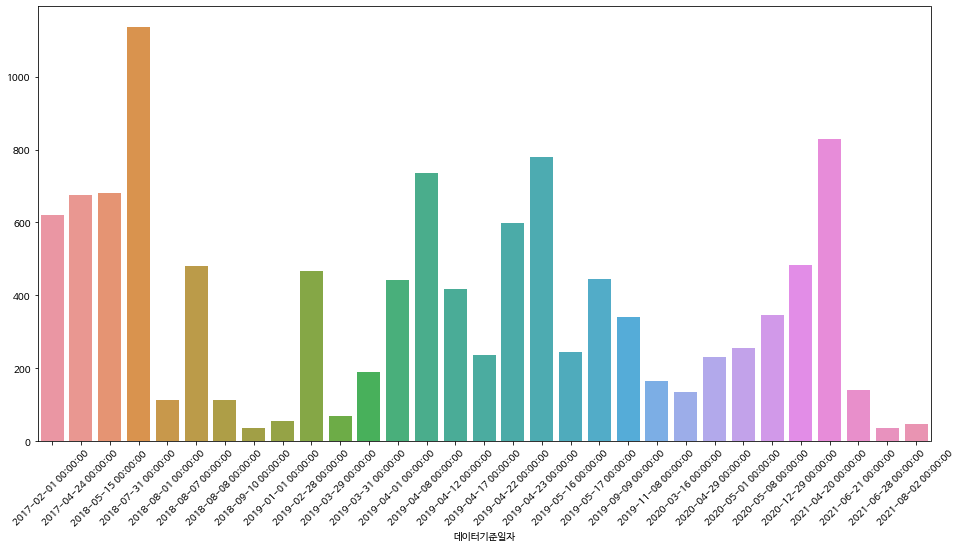

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 ) #글씨 회전
sns.barplot(y=g3.values, x=g3.index)

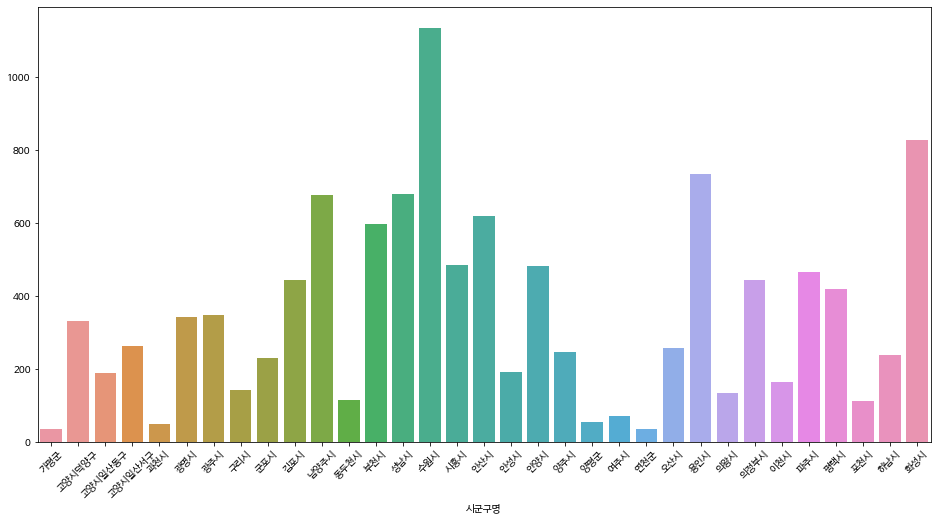

In [ ]:
g4= data_k.groupby("시군구명")['데이터기준일자'].count()
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 )
sns.barplot(y=g4.values, x=g4.index)

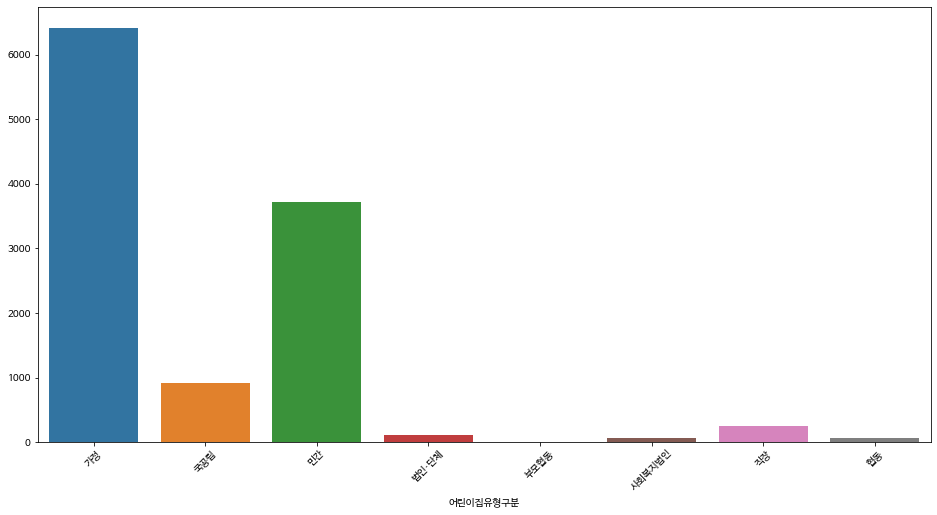

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 )
sns.barplot(y=g.values, x=g.index)